## 1: Importing data

In [1]:
## Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

## Specify path of file containing data data
path = "gdrive/MyDrive/Nonofo_Madigele_Project/Data/"

## Read data
df = pd.read_excel(path + "Training_data.xlsx")

##Directory to save images
img_directory = path

## 2: Exploring the data

In [3]:
## Print first five rows
df.head()

,ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,1,1999,0,0.500799,0.306846,0.043373,0.956271,0.334774
1,1,2000,0,0.547780,0.322214,0.051843,1.064545,0.334591
2,1,2001,0,0.451001,0.225150,0.026813,0.804096,0.245585
3,1,2002,0,0.306887,0.191936,0.030058,0.387010,0.253438
4,1,2003,0,0.447246,0.217368,0.032458,0.791639,0.275531


#### 2.1: Descriptive statistics

In [4]:
## Description of the data
df[['Default','WC/TA','RE/TA','EBIT/TA','ME/TL','S/TA']].describe()

,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.018000,0.142514,0.210467,0.051803,1.953963,0.303652
std,0.132968,0.170763,0.332549,0.029596,2.994475,0.205794
min,0.000000,-2.240268,-3.312420,-0.591821,0.023718,0.035858
25%,0.000000,0.031167,0.094744,0.038992,0.623493,0.170836
50%,0.000000,0.117273,0.218929,0.051563,1.136456,0.261037
75%,0.000000,0.241775,0.373417,0.065093,2.244287,0.366936
max,1.000000,0.766040,1.639646,0.198035,60.607150,5.007775


### 2.2: Number of default and non-default rows

In [5]:
print('Dataframe has',df['Default'].value_counts()[0],'non defaults and', df['Default'].value_counts()[1], 'defaults')

Dataframe has 3928 non defaults and 72 defaults


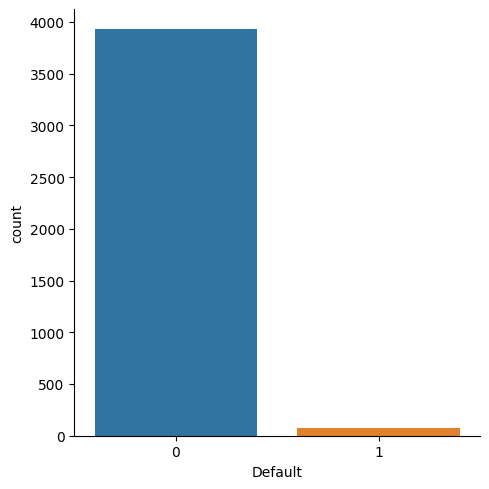

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(data=df, x="Default", kind="count")

## Save image
plt.savefig(f'{img_directory}/Default.png')
plt.show()

## 3: Data preparation

### 3.1: Checking for duplicates

In [7]:
df.duplicated().describe()

count      4000
unique        1
top       False
freq       4000
dtype: object

### 3.2: Checking for missing values

In [8]:
df.isnull().describe()

,ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
count,4000,4000,4000,4000,4000,4000,4000,4000
unique,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,4000,4000,4000,4000,4000,4000,4000,4000


### 3.3: Multicollinearity test

#### 3.3.1: Covariance heatmap

<ipython-input-9-8de482c6994c>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


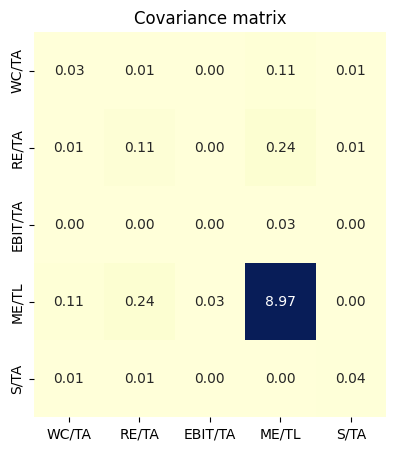

In [9]:
import seaborn as sns
import numpy as np


X = np.stack((df['WC/TA'],df['RE/TA'], df['EBIT/TA'], df['ME/TL'], df['S/TA']), axis=0)
plt.rcParams['figure.figsize'] = [10, 5]
plt.axis('scaled')
plt.subplot(1,2,1)
sns.heatmap(np.cov(X), 
        annot=True,
        cbar = False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df.columns[3:],
        yticklabels=df.columns[3:])
plt.title("Covariance matrix")

## Save image
plt.savefig(f'{img_directory}/Covariance matrix.png')
plt.show()

#### 3.3.2: Correlation heatmap

<ipython-input-10-31c05a786c83>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


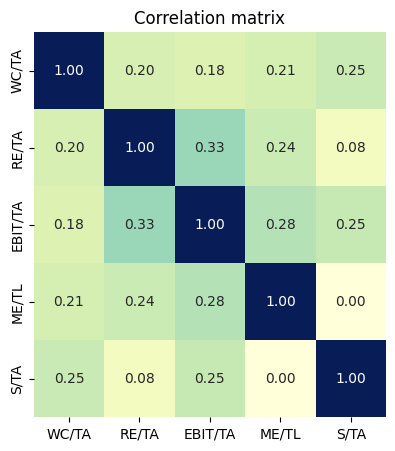

In [10]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.axis('scaled')
plt.subplot(1,2,1)
sns.heatmap(np.corrcoef(X), 
        annot=True,
        cbar = False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df.columns[3:],
        yticklabels=df.columns[3:])
plt.title("Correlation matrix")

## Save figure
plt.savefig(f'{img_directory}/Correlation matrix.png')
plt.show()

## 3: Logistic model

### 3.1: Model 1

In [11]:
## Model variables
X_train = df[['WC/TA','RE/TA','EBIT/TA','ME/TL','S/TA']]

## Categorical variable
y_train = df['Default']

from statsmodels.api import Logit, add_constant

## Adding intercept
X_train_const = add_constant(X_train)

## The model
model_1 = Logit(y_train, X_train_const)

## Fitting the model
model_1_fitted = model_1.fit()

# Model summary
print(model_1_fitted.summary())

Optimization terminated successfully.
         Current function value: 0.070131
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.2221
Time:                        16:40:10   Log-Likelihood:                -280.53
converged:                       True   LL-Null:                       -360.60
Covariance Type:            nonrobust   LLR p-value:                 9.205e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5435      0.266     -9.561      0.000      -3.065      -2.022
WC/TA          0.4144      0

### 3.1: Removing insignificant variables

In [12]:
for x,y in model_1_fitted.pvalues.items():
  
  ## Remove columns with p-values greater or equal to alpha = 0.05
  if y >= 0.05:

    ## Drop columns
    df.drop(columns=[f"{x}"], inplace = True)

## Check
df.head()

,ID,Year,Default,RE/TA,EBIT/TA,ME/TL
0,1,1999,0,0.306846,0.043373,0.956271
1,1,2000,0,0.322214,0.051843,1.064545
2,1,2001,0,0.225150,0.026813,0.804096
3,1,2002,0,0.191936,0.030058,0.387010
4,1,2003,0,0.217368,0.032458,0.791639


### 3.1: Model 2

In [13]:
## Model variables
X_train = df[['RE/TA','EBIT/TA','ME/TL']]

## Categorical variable
y_train = df['Default']

from statsmodels.api import Logit, add_constant

## Adding intercept
X_train_const = add_constant(X_train)

## The model
model_2 = Logit(y_train, X_train_const)

## Fitting the model
model_2_fitted = model_2.fit()

## Model summary
print(model_2_fitted.summary())

#print(model_2_fitted.summary(alpha=0.05)) # use this to change significance level


Optimization terminated successfully.
         Current function value: 0.070555
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3996
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.2174
Time:                        16:40:10   Log-Likelihood:                -282.22
converged:                       True   LL-Null:                       -360.60
Covariance Type:            nonrobust   LLR p-value:                 9.164e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3183      0.236     -9.839      0.000      -2.780      -1.856
RE/TA         -1.4197      0

## 4: Choosing a significant model

In [14]:
## Likelihood ratio test statistic
LR = 2*(model_1_fitted.llf - model_2_fitted.llf)
print('Likelihood ratio statistic:',round(LR,3))

import scipy.stats

## p value from chi-squared distribution
print(f'p-value: {np.round( (1 - scipy.stats.chi2.cdf( LR,df = 2 ) )*100,1)}%')
#print(scipy.stats.chi2.cdf( LR,df = 2 ))

Likelihood ratio statistic: 3.387
p-value: 18.4%


In [15]:
#!pip install skimpy

In [16]:
#from skimpy import skim

#skim(df)